1. 알고리즘 : 앙상블 - Voting , RandomForest(begging), 교차검증
2. 데이터 셋 : 래드와인, 화이트와인, 와인종류 판별
3. 데이터 셋의 소개 : 종속변수(class), 독립변수
       (fixed acidity |   volatile acidity  |  citric acid          | residual sugar
          chlorides   | free sulfur dioxide |  total sulfur dioxide | density
              pH      |  sulphates, alcohol |  class])

4. 문제유형 : 분류
5. 평가지표 : RMSE
6. 사용할 모델 : LogisticRegression, KNeighborsClassifier, RandomForestClassifier
7. 사용 라이브러리 : numpy, pands, sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from warnings import filterwarnings
import warnings

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')

## 데이터 로딩

In [2]:
wine_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
wine_red = wine_red.drop('quality', axis=1)
wine_white = wine_white.drop('quality', axis=1)

In [4]:
wine_red['class'] = 1
wine_white['class'] = 0

In [5]:
wine = pd.concat([wine_red, wine_white])

In [6]:
df = pd.DataFrame(wine)

In [7]:
wine_data = df.iloc[:, :-1].to_numpy()
wine_target = df.iloc[:, -1].to_numpy()

In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')

In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
class                   0
dtype: int64

In [12]:
df.corrwith(df['class'])

fixed acidity           0.486740
volatile acidity        0.653036
citric acid            -0.187397
residual sugar         -0.348821
chlorides               0.512678
free sulfur dioxide    -0.471644
total sulfur dioxide   -0.700357
density                 0.390645
pH                      0.329129
sulphates               0.487218
alcohol                -0.032970
class                   1.000000
dtype: float64

In [13]:
df.shape

(6497, 12)

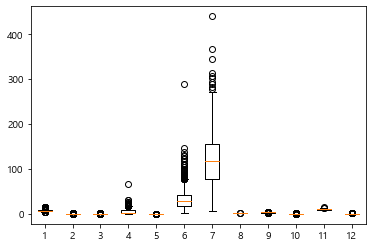

In [14]:
plt.boxplot(df)
plt.show()

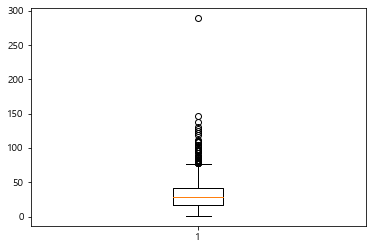

In [15]:
plt.boxplot(df['free sulfur dioxide'])
plt.show()

In [16]:
#df[df['free sulfur dioxide'] == 289.0] == 37.041472

In [17]:
# 데이터 분류
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size = 0.2, random_state = 50)

# 앙상블 for Voting

In [18]:
# 부팅 분류기 Voting
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


lg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 3)


voting_model = VotingClassifier(estimators = [('lg', lg), ('knn',knn)], voting = 'soft')

voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)

In [19]:
print('보팅 분류기 정확도 : %.3f' %(accuracy_score(y_test, pred)))

보팅 분류기 정확도 : 0.969


In [20]:
# 각 모델 에측과 평가
models = [lg, knn]
for model in models :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    model_name = model.__class__.__name__
    print('%s 정확도 : %.3f' %(model_name, accuracy_score(pred, y_test)))

LogisticRegression 정확도 : 0.982
KNeighborsClassifier 정확도 : 0.942


# Random Forest for Begging

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state = 50)
scores = cross_validate(rf, X_train, y_train, return_train_score=True)

In [22]:
print(' trian score :', np.mean(scores['train_score']),'\n test score  :', np.mean(scores['test_score']))

 trian score : 0.9996632765215878 
 test score  : 0.9946133486340416


In [23]:
# 부트슽랩트에 포함되니 않는 데이터를 가지고 평가하기

rf = RandomForestClassifier(oob_score = True, n_jobs=-1, random_state = 50)
rf.fit(X_train, y_train)
print('obb점수 : ', rf.oob_score_)

obb점수 :  0.9946122763132577


In [24]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error # MSE**0.5 거듭제곱 해야함

print('train_RMSE : ', mean_squared_error(y_train, train_pred)**0.5,
      '\ntest_RMSE  : ', mean_squared_error(y_test, test_pred)**0.5)

train_RMSE :  0.1749130463761141 
test_RMSE  :  0.24178820993079556


In [26]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9996151625938041
0.9953846153846154


# 교차검증

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

SKFold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=50)

# cross_validate(모델객체, 훈련문제, 훈련정답, n_jobs = -1)
model_cross = cross_validate(rf, X_train, y_train, cv=SKFold)

train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [28]:
print('train_RMSE : ', mean_squared_error(y_train, train_pred)**0.5,
      '\ntest_RMSE  : ', mean_squared_error(y_test, test_pred)**0.5)

train_RMSE :  0.019617273159027025 
test_RMSE  :  0.06793662204867575


In [29]:
np.mean(model_cross['test_score'])

0.9951893462648996

# 확률적 경사 하강법(SGD)

In [37]:
from sklearn.linear_model import SGDClassifier 

sc = SGDClassifier(loss='log', max_iter=10, random_state=50)
sc.fit(X_train, y_train)

print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.9455455070232827
0.9376923076923077


In [43]:
np.unique(y_train) 

array([0, 1], dtype=int64)

In [60]:
sc = SGDClassifier(loss='log', random_state = 50)

train_score = []
test_score = []

classes = np.unique(y_train)

for _ in range(0, 40) :
    sc.partial_fit(X_train, y_train, classes = classes)
    train_score.append(sc.score(X_train, y_train))
    test_score.append(sc.score(X_test,y_test))

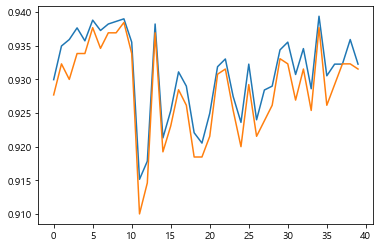

In [61]:
import seaborn as sns

plt.plot(train_score)
plt.plot(test_score)

In [75]:
sc = SGDClassifier(loss='log', max_iter=12, random_state=50)
sc.fit(X_train, y_train)

print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.9426592264768135
0.9407692307692308


In [76]:
train_pred = sc.predict(X_train)
test_pred = sc.predict(X_test)

In [78]:
print('train_RMSE : ', mean_squared_error(y_train, train_pred)**0.5,
      '\ntest_RMSE  : ', mean_squared_error(y_test, test_pred)**0.5)

train_RMSE :  0.2394593358447034 
test_RMSE  :  0.24337372337779037
